In [2]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import json
import sys
sys.path.append("..")
from utils.synth_utils import meta2yolo_prep, metadata2yolo_labels

/home/mkutuga/anaconda3/envs/semif/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data

In [3]:
datadir = "/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results"
jsonpaths = sorted(list(Path("/home/mkutuga/SemiF-SyntheticPipeline/data/projects/very_big/results/metadata").glob("*.json")))
imgpaths =  sorted(list(Path("/home/mkutuga/SemiF-SyntheticPipeline/data/projects/very_big/results/images").glob("*.png")))

data = []
for imgp, jsonp in zip(imgpaths, jsonpaths):
    data.append(meta2yolo_prep(jsonp, imgp))

## Show some images

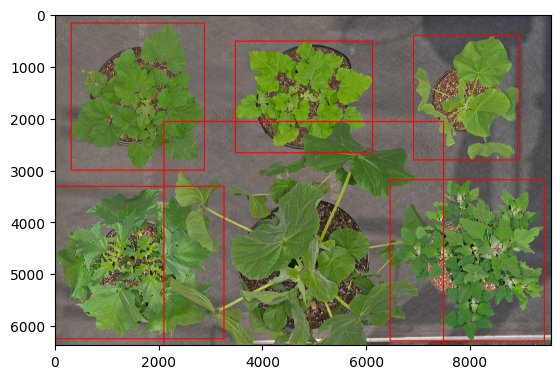

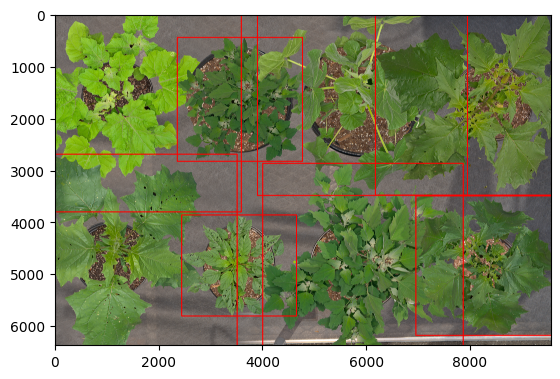

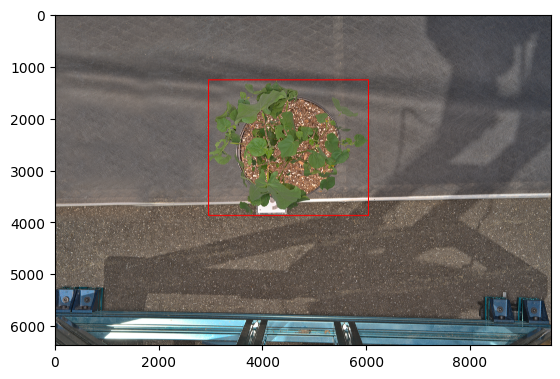

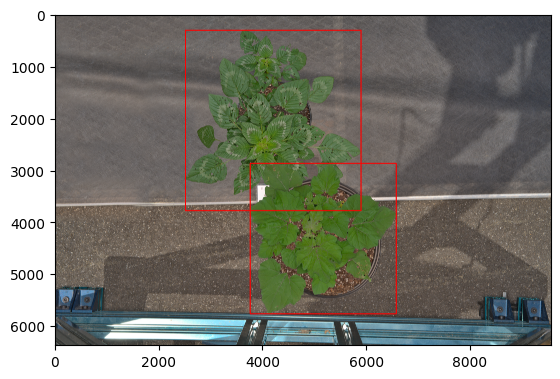

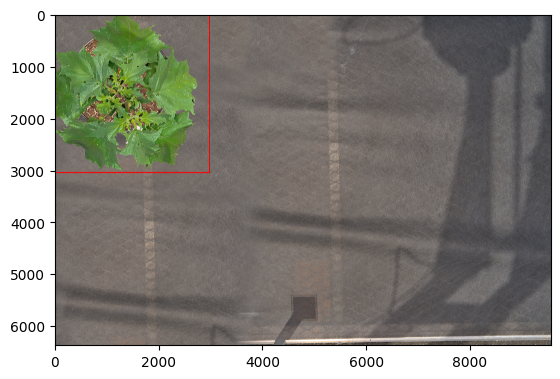

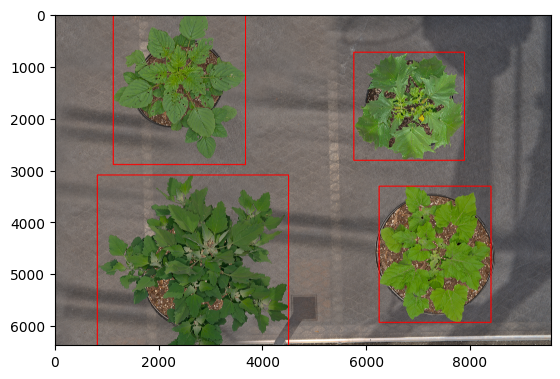

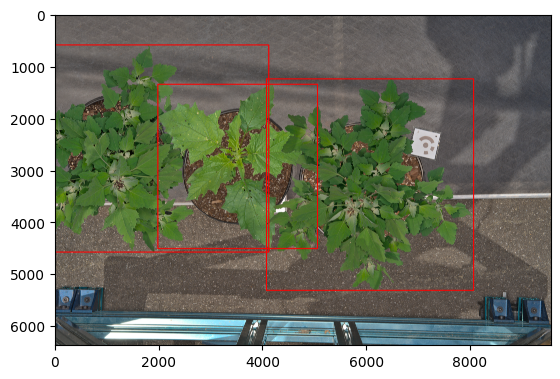

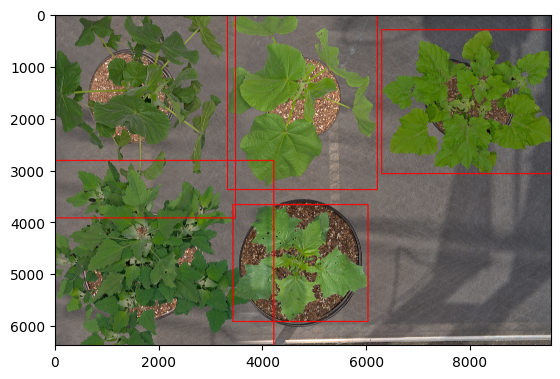

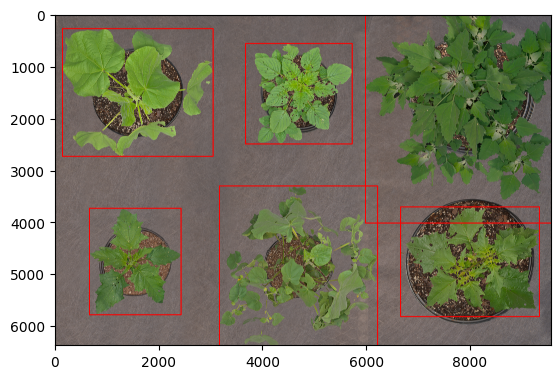

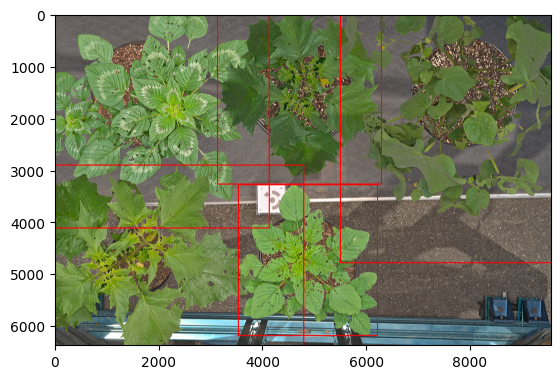

In [5]:
for i in data:
    imgp = i["img_path"]
    img = cv2.imread(str(imgp))
    im_hw = img.shape[:2]
    for bounding_box in i["bboxes"]:
        x0 = bounding_box[0] * im_hw[1]
        x1 = (bounding_box[0] * im_hw[1])+ bounding_box[2]* im_hw[1]
        y0 = bounding_box[1]* im_hw[0]
        y1 = (bounding_box[1]  * im_hw[0]) + bounding_box[3]* im_hw[0]
        
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        cv2.rectangle(img, start_point, end_point, color=(0,0,255), thickness=20)
    
    # cv2.imwrite("example_with_bounding_boxes.jpg", img)
    cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cvt_img)
    plt.show()

# Convert to text files

class x_center y_center width height 

In [51]:
metadata2yolo_labels(datadir, data)

In [52]:
data

[{'img_path': PosixPath('/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results/images/4af98dccfaa240e8b0c035f8dac0f6d5.png'),
  'bbox': [[0.1489539748953975,
    0.1515389447236181,
    0.15836820083682007,
    0.2551821608040201],
   [0.17144351464435145,
    0.6623743718592965,
    0.12217573221757322,
    0.19048366834170855],
   [0.5827405857740586, 0.0, 0.23619246861924686, 0.3965138190954774]],
  'cls_id': 1},
 {'img_path': PosixPath('/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results/images/50cad571dc504a0e89bcbf710e3e6dfb.png'),
  'bbox': [[0.10910041841004184,
    0.10254396984924623,
    0.23817991631799162,
    0.30574748743718594],
   [0.11276150627615063,
    0.551036432160804,
    0.29341004184100417,
    0.528109296482412],
   [0.597489539748954, 0.0, 0.3253138075313807, 0.5453831658291457],
   [0.5908995815899581,
    0.5654836683417085,
    0.3051255230125523,
    0.48115577889447236]],
  'cls_id': 5},
 {'img_path': PosixP